# Explore here

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

data_dir = '../data/raw/train/dog'

imagenes = os.listdir(data_dir)





In [4]:
from tensorflow import keras
from keras.preprocessing import image

img = []

for i in range(9):
    img_path = os.path.join(data_dir,imagenes[i])
    imagen = image.load_img(img_path)
    img_array = image.img_to_array(imagen)
    img_array /= 255
    img.append(img_array)


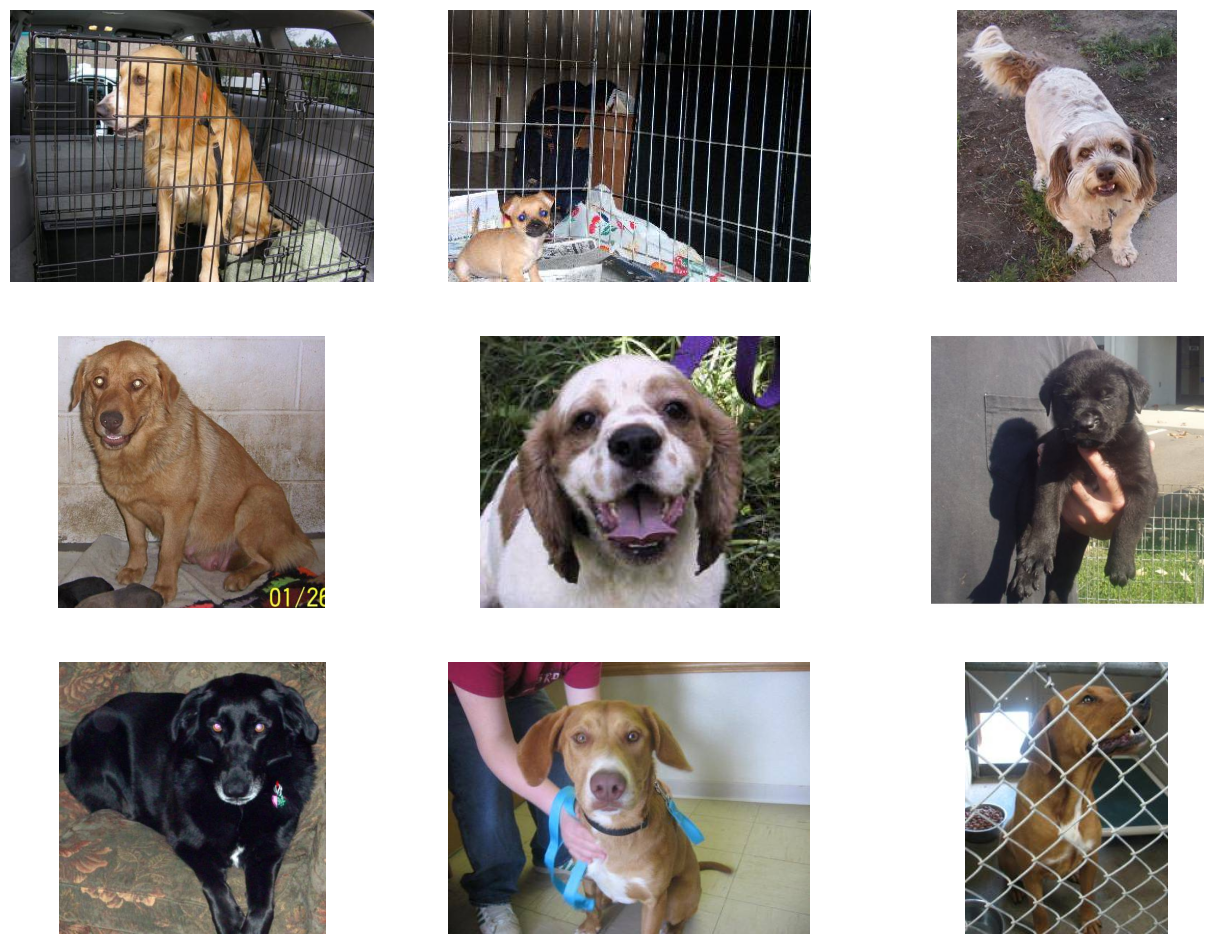

In [5]:
plt.figure(figsize=(16,12))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(img[i])
    plt.axis('off')

In [ ]:
for im in imagenes:
    img_path = os.path.join(data_dir,im)
    if 'dog' in im:
        mv_path = os.path.join(data_dir,'dog',im)
    else:
        mv_path= os.path.join(data_dir,'cat',im)
    os.system('mv '+img_path+' '+mv_path)

mv: cannot move '../data/raw/train/dog' to a subdirectory of itself, '../data/raw/train/dog/dog'
mv: cannot move '../data/raw/train/cat' to a subdirectory of itself, '../data/raw/train/cat/cat'


In [6]:
from keras.preprocessing.image import ImageDataGenerator

dir_train = '../data/raw/train/'
dir_test = '../data/raw/'
image_size = (200,200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

data_train = datagentrain.flow_from_directory(
    dir_train,
    target_size = image_size,
    classes = ['dog','cat']
)

data_test = datagentest.flow_from_directory(
    dir_test,
    target_size = image_size,
    classes = ['test1']
)

Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

model.add(Conv2D(input_shape=(200,200,3),filters=64,kernel_size=(3,3),padding = "same", activation = "relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding = "same", activation = "relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding = "same", activation = "relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding = "same", activation = "relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding = "same", activation = "relu"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding = "same", activation = "relu"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding = "same", activation = "relu"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding = "same", activation = "relu"))
model.add(Conv2D(filters=512,kernel_size=(3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=4096,activation = "relu"))
model.add(Dense(units=4096,activation = "relu"))
model.add(Dense(units=2,activation="softmax"))

In [8]:
from keras.optimizers import Adam

model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate=0.001),metrics=['accuracy'])

In [9]:
model.fit(data_train,epochs=2)

Epoch 1/2
782/782 [==============================] - 3750s 5s/step - loss: 2.1103 - accuracy: 0.4992
Epoch 2/2
782/782 [==============================] - 3721s 5s/step - loss: 0.6932 - accuracy: 0.5019


In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("../models/vgg16_1.h5", monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(data_train, steps_per_epoch = 100, validation_data = data_test, validation_steps = 10, epochs = 3, callbacks = [checkpoint, early])


Epoch 1/3
100/100 [==============================] - ETA: 0s - loss: 0.6935 - accuracy: 0.4856
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to ../models/vgg16_1.h5


/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 491s 5s/step - loss: 0.6935 - accuracy: 0.4856 - val_loss: 1.3863 - val_accuracy: 1.0000
Epoch 2/3
100/100 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5031
Epoch 2: val_accuracy did not improve from 1.00000
100/100 [==============================] - 512s 5s/step - loss: 0.6932 - accuracy: 0.5031 - val_loss: 1.3865 - val_accuracy: 1.0000
Epoch 3/3
100/100 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.5116
Epoch 3: val_accuracy did not improve from 1.00000
100/100 [==============================] - 487s 5s/step - loss: 0.6930 - accuracy: 0.5116 - val_loss: 1.3869 - val_accuracy: 1.0000


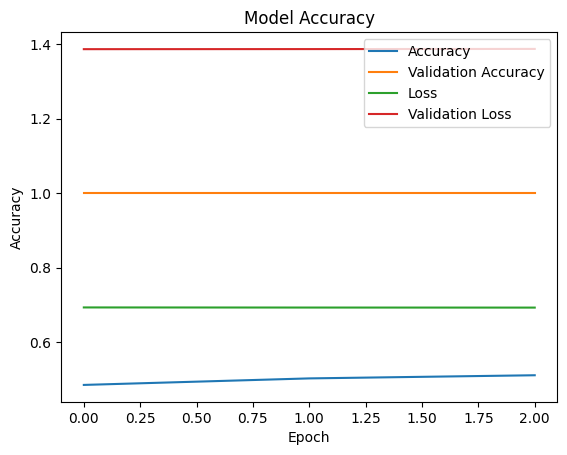

In [11]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])


1/1 [==============================] - 0s 166ms/step
cat


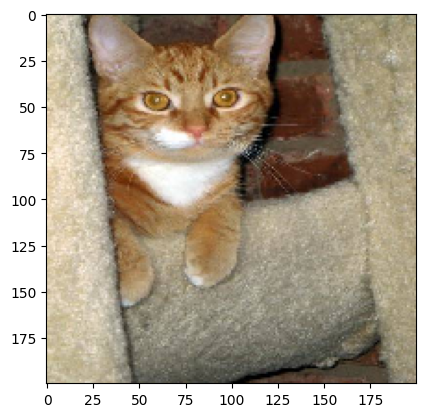

In [6]:
from keras.models import load_model
from tensorflow import keras
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img = image.load_img("../data/raw/test1/15.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")